In [1]:
config_blob = """{
    "name": "czii_cryoet_mlchallenge_2024",
    "description": "2024 CZII CryoET ML Challenge training data.",
    "version": "1.0.0",

    "pickable_objects": [
        {
            "name": "apo-ferritin",
            "is_particle": true,
            "pdb_id": "4V1W",
            "label": 1,
            "color": [  0, 117, 220, 128],
            "radius": 60,
            "map_threshold": 0.0418
        },
        {
            "name": "beta-amylase",
            "is_particle": true,
            "pdb_id": "1FA2",
            "label": 2,
            "color": [153,  63,   0, 128],
            "radius": 65,
            "map_threshold": 0.035
        },
        {
            "name": "beta-galactosidase",
            "is_particle": true,
            "pdb_id": "6X1Q",
            "label": 3,
            "color": [ 76,   0,  92, 128],
            "radius": 90,
            "map_threshold": 0.0578
        },
        {
            "name": "ribosome",
            "is_particle": true,
            "pdb_id": "6EK0",
            "label": 4,
            "color": [  0,  92,  49, 128],
            "radius": 150,
            "map_threshold": 0.0374
        },
        {
            "name": "thyroglobulin",
            "is_particle": true,
            "pdb_id": "6SCJ",
            "label": 5,
            "color": [ 43, 206,  72, 128],
            "radius": 130,
            "map_threshold": 0.0278
        },
        {
            "name": "virus-like-particle",
            "is_particle": true,
            "label": 6,
            "color": [255, 204, 153, 128],
            "radius": 135,
            "map_threshold": 0.201
        },
        {
            "name": "membrane",
            "is_particle": false,
            "label": 7,
            "color": [100, 100, 100, 128]
        }

    ],

    "overlay_root": "working/overlay",

    "overlay_fs_args": {
        "auto_mkdir": true
    },

    "static_root": "Extracted_Data/train/static"
}"""

copick_config_path = "working/copick.json"
output_overlay = "working/overlay"

with open(copick_config_path, "w") as f:
    f.write(config_blob)


In [2]:
import os
import shutil
import numpy as np

# Define source and destination directories
source_dir = 'Extracted_Data/train/overlay'
destination_dir = 'working/overlay'

# Walk through the source directory
for root, dirs, files in os.walk(source_dir):
    # Create corresponding subdirectories in the destination
    relative_path = os.path.relpath(root, source_dir)
    target_dir = os.path.join(destination_dir, relative_path)
    os.makedirs(target_dir, exist_ok=True)

    # Copy and rename each file
    for file in files:
        if file.startswith("curation_0_"):
            new_filename = file
        else:
            new_filename = f"curation_0_{file}"


        # Define full paths for the source and destination files
        source_file = os.path.join(root, file)
        destination_file = os.path.join(target_dir, new_filename)

        # Copy the file with the new name
        shutil.copy2(source_file, destination_file)
        print(f"Copied {source_file} to {destination_file}")


Copied Extracted_Data/train/overlay/ExperimentRuns/TS_73_6/Picks/ribosome.json to working/overlay/ExperimentRuns/TS_73_6/Picks/curation_0_ribosome.json
Copied Extracted_Data/train/overlay/ExperimentRuns/TS_73_6/Picks/thyroglobulin.json to working/overlay/ExperimentRuns/TS_73_6/Picks/curation_0_thyroglobulin.json
Copied Extracted_Data/train/overlay/ExperimentRuns/TS_73_6/Picks/virus-like-particle.json to working/overlay/ExperimentRuns/TS_73_6/Picks/curation_0_virus-like-particle.json
Copied Extracted_Data/train/overlay/ExperimentRuns/TS_73_6/Picks/beta-galactosidase.json to working/overlay/ExperimentRuns/TS_73_6/Picks/curation_0_beta-galactosidase.json
Copied Extracted_Data/train/overlay/ExperimentRuns/TS_73_6/Picks/apo-ferritin.json to working/overlay/ExperimentRuns/TS_73_6/Picks/curation_0_apo-ferritin.json
Copied Extracted_Data/train/overlay/ExperimentRuns/TS_73_6/Picks/beta-amylase.json to working/overlay/ExperimentRuns/TS_73_6/Picks/curation_0_beta-amylase.json
Copied Extracted_Dat

In [3]:
from deepfindET.entry_points import step1
from deepfindET.utils import copick_tools
import copick
copick_root = copick.from_file(copick_config_path)


In [4]:
import os
runs = os.listdir('Extracted_Data/train/static/ExperimentRuns')
voxel_size = 10
tomogram_algo = 'denoised'

out_name = 'remotetargets'
out_user_id = 'deepfindET'
out_session_id = '0'

train_targets = {}

targets = [(obj.name, None, None, (obj.radius / voxel_size)) for obj in copick_root.pickable_objects if obj.is_particle]
targets

[('apo-ferritin', None, None, 6.0),
 ('beta-amylase', None, None, 6.5),
 ('beta-galactosidase', None, None, 9.0),
 ('ribosome', None, None, 15.0),
 ('thyroglobulin', None, None, 13.0),
 ('virus-like-particle', None, None, 13.5)]

In [5]:
for t in targets:
    obj_name, user_id, session_id, radius = t
    info = {
        "label": copick_root.get_object(obj_name).label,
        "user_id": user_id,
        "session_id": session_id,
        "radius": radius,
        "is_particle_target": True,
    }
    train_targets[obj_name] = info


seg_targets = [('membrane', None, None)]
for s in seg_targets:
    obj_name, user_id, session_id = s
    info = {
        "label": copick_root.get_object(obj_name).label,
        "user_id": user_id,
        "session_id": session_id,
        "radius": None,
        "is_particle_target": False,
    }
    train_targets[obj_name] = info

runId = None

step1.create_train_targets(
    copick_config_path,
    train_targets,
    runId,
    voxel_size,
    tomogram_algo,
    out_name,
    out_user_id,
    out_session_id
)


Processing Run: TS_5_4
Annotating 140 objects ...

Processing Run: TS_69_2
Annotating 143 objects ...

Processing Run: TS_6_4
Annotating 193 objects ...

Processing Run: TS_6_6
Annotating 143 objects ...

Processing Run: TS_73_6
Annotating 217 objects ...

Processing Run: TS_86_3
Annotating 225 objects ...

Processing Run: TS_99_9
Annotating 208 objects ...



In [6]:
tomograms = np.array([copick_tools.get_copick_tomogram(copick_root,
                                            voxelSize = voxel_size,
                                            tomoAlgorithm=tomogram_algo,
                                            tomoID=i) for i in runs])

masks = np.array([copick_tools.get_copick_segmentation(copick_root.get_run(i),
                                            segmentationName=out_name,
                                            userID=out_user_id,
                                            sessionID=out_session_id) for i in runs])


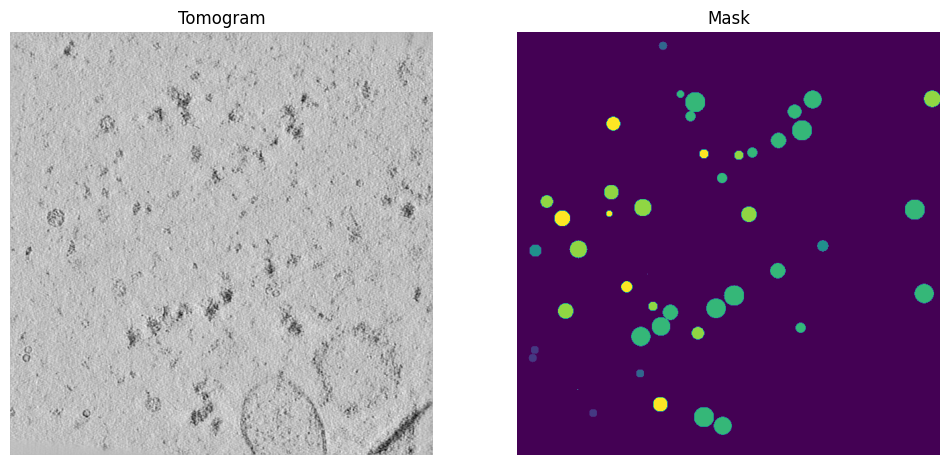

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

tomogram = np.array(tomograms[0])
mask = np.array(masks[0])

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.title('Tomogram')
plt.imshow(tomogram[90,], cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Mask')
plt.imshow(mask[90,])
plt.axis('off')

plt.show()